# MNIST Dataset with a Basic Approach using TensorFlow

* This code uses many built-in functions(for batches) and basic approach to solve 
* Refer MNIST_CNN_tensorflow for more detailed approach

In [1]:
import tensorflow as tf 

C:\Users\jsidd\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data         

One_hot is set True 
    * it creates 10 columns for the one column given(0-9)
    * 7 will be represented in that 10 columns as [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]

In [3]:
mnist = input_data.read_data_sets('MNIST_data/',one_hot=True)       # if nothing is found then it downloads the data

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
sample_image = mnist.train.images[0].reshape(28,28)     # Since all are of shape (1,784) we reshape it to 28, 28 to plot it

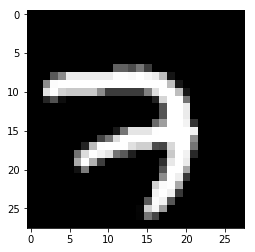

In [6]:
plt.imshow(sample_image,cmap='gray')   # imshow-> used for plotting images
                                       # cmap-> gives gray color to the coloured part 

# Steps :
    1.PlaceHolder
    2.Variables
    3.Create graph Operation
    4.Loss Function
    5.Optimizer
    6.Create Session

In [7]:
#Placeholder
x = tf.placeholder(tf.float32,shape=[None,784])      # None-> because it wil depend on the batch_size for that parameter
y_true = tf.placeholder(tf.float32,shape=[None,10])  # same as above

Regarding the Shapes:
    * y = tf.matmul(x,w) + b
    * since x and w are multiplied therefore 2nd parameter of x becomes 1st parameter of y
    * and we will be classifying for 10 numbers(or 10 columns) thus 2nd parameter of y becomes 10
    * now tf.matmul(x,w) has shape(None, 10) None here is the batch_size 
    * thus the shape of bias will be 10

In [8]:
#Variables
w = tf.Variable(tf.zeros([784,10]))           
b = tf.Variable(tf.zeros([10]))

In [9]:
#Create graph Operation 
y = tf.matmul(x,w) + b

In [10]:
#Loss Function
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = y_true , logits= y))

In [11]:
#Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(cross_entropy)

In [12]:
#Create Session
init = tf.global_variables_initializer()     # to initialize all the vairables

In [13]:
with tf.Session() as sess:
    
    sess.run(init)
    
    for step in range(1000):
        
        batch_x , batch_y = mnist.train.next_batch(100)    # this implicitly creates bacthes of 100 samples
        
        sess.run(train, feed_dict = {x:batch_x,y_true:batch_y})     # Running the Session
    
    # evaluate the model 
    # here we create a list correct prediction
    #comparing the index of max value of actual value and predicted value 
    correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_true, 1))   
    
    #convert the boolean values into 0's and 1's
    acc = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    
    #predicted [3,4,..] but true values were [3,9,..]
    #[True,False,..]
    #we cast it to float32(numeric value)[1,0,..]
    #accuracy turns to be 0.5 for 1st two values
    
    print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))
    pred_w , pred_b = sess.run([w,b])
    

0.9148


In [14]:
import numpy as np

In [15]:
# selecting a random index from the total test data
pred_index = np.random.randint(0,mnist.test.num_examples)

In [16]:
# calculating the predictded label using the trained weight  and bias from the Session
pred_y = tf.matmul(mnist.test.images[pred_index].reshape((1,784)),pred_w) + pred_b

Expected Value is 5
Predicted Value is [5]


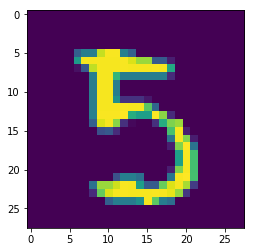

In [17]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    plt.imshow(mnist.test.images[pred_index].reshape(28,28))    # plot the image
    print("Expected Value is "+ str(np.argmax(mnist.test.labels[pred_index])))  # printing the expected value
    print("Predicted Value is "+ str(sess.run(tf.argmax(pred_y,1)))) # Finally printing the predicted value